# Google Data Analytics Professional Certificate: Capstone Project
## Bellabeat: How Can A Wellness Technology Company Play It Smart?
Author: Sahil Kunder

Date: 23<sup>rd</sup> November 2022
***

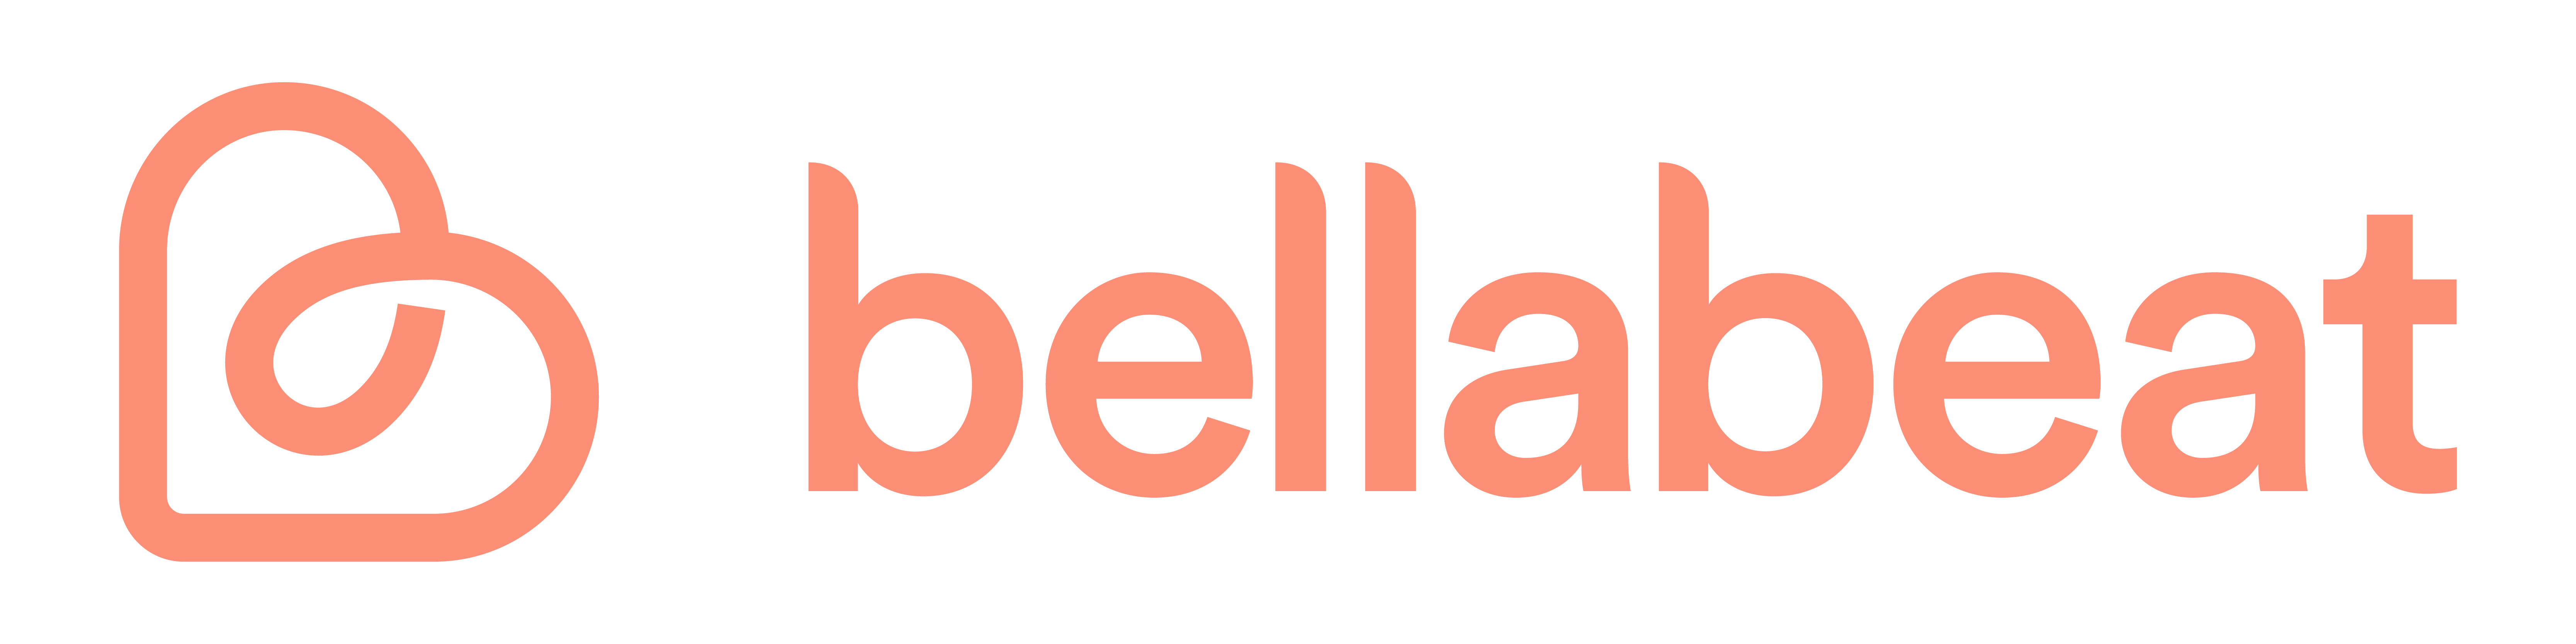

## Introduction
This is one of the two optional capstone projects offered by Google in their Data Analytics course. This case study involves performing real-world tasks as a junior data analyst in order to answer the key business questions.

## Scenario
I am a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, co-founder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights I discover will then help guide marketing strategy for the company. I will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

## Background
Bellabeat is a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices.

To answer the key business questions, I broke down the data analysis process into six key stages: **Ask, Prepare, Process, Analyze, Share** and **Act**, as taught in the Google Analytics Course.

## 1. Ask
### Business Task:
Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices and discover trends and insights for Bellabeat marketing strategy.

### Business questions:
* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

### Key deliverables:
* A clear summary of the business task.
* A description of all data sources used.
* Documentation of any cleaning or manipulation of data.
* A summary of your analysis.
* Supporting visualizations and key findings.
* Your top high-level content recommendations based on your analysis.

### Key stakeholders:
* **Urška Sršen**: Bellabeat’s co-founder and Chief Creative Officer.
* **Sando Mur**: Mathematician and Bellabeat’s co-founder; key member of the Bellabeat executive team.
* **Bellabeat marketing analytics team**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

## 2. Prepare
Sršen recommended to use a public dataset that explores smart device users’ daily habits which is found on [Kaggle: FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain, dataset made available through [Mobius](https://www.kaggle.com/arashnic)). This Kaggle data set contains personal fitness tracker from thirty FitBit users. Thirty eligible FitBit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. The dataset contains 18 csv files generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.

### Issues with the credibility of the dataset
I will be using **ROCCC** to determine if there are any issues with bias or credibility in this data.
* **R**eliable: **NOT** reliable. The FitBit dataset only contains information collected from 30 users from a potential pool of 23 million registered FitBit users. Hence, if we want a confidence level of 95% with a sample size of 30 individuals that would equate to a 18% margin of error, which is not a representative sample of the population suggesting the data could be biased. We would need at least 300 users to bring the margin of error down to 5%. According to the **Central Limit Theorem (CLT)**, a sample size of 30 often increases the confidence interval of your population data set enough to warrant assertions against your findings ([Source](https://www.investopedia.com/terms/c/central_limit_theorem.asp#:~:text=To%20be%20safe%2C%20at%20least,central%20limit%20theorem%20to%20hold.)). Moreover, the dataset contains data collected over a 2 month period which is not long enough to deduce accurate and reliable trends.
* **O**riginal: **NOT** original. The dataset was generated by a third party provider (Amazon Mechanical Turk)
* **C**omprehensive: **LOW**. I would not consider the dataset to be comprehensive enough to gain meaningful actionable insights. There are some parameters that match Bellabeat's product's parameters but the dataset lacks information on sex, age, height etc. Also the data available was collected over the course of two months, which is a short time-span to gain a concrete understanding of the trends that may exist. A dataset containing a year's worth of data would be more preferable. Finally, I don't know how the individuals were chosen for the dataset, or even if there was a bias in the selection of the 30 individuals.
* **C**urrent: **NOT** current. The dataset was last updated in 2016 which is 6 years ago. This may not give an accurate vision of the current trends in how people use fitness trackers.
* **C**ited: Cited but **MAY NOT** be credible: As mentioned earlier the dataset was compiled by Amazon Mechanical Turk, there is no information on the credibility of this organization.

### Loading relevant packages
I decided to conduct my analysis using Python as it is a flexible, open source platform capable of handling all aspects of data analysis such as; cleaning, analyzing and visualizing.

The following packages were imported:

1. **pandas**: A package widely used for data science/analytics and machine learning.
1. **numpy**: A package used for working with arrays.
1. **datetime**: A module that supplies classes for manipulating dates and times.
1. **matplotlib.pyplot**: A plotting library used for 2D graphics.

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

### Importing and reading the dataset
Using the `pandas` python package I loaded the `dailyActivity_merged.csv` file and created a dataframe out of the data.

In [2]:
# Reading the relevant csv data file
d_a = pd.read_csv('/Users/sahil/OneDrive/Google Professional Analytics Certificate/8. Capstone/Case_Study_2_Bellabeat/dailyActivity_merged.csv')

## 3. Process
Once the data was prepped for analysis, I began cleaning and verifying the data formats. The first step was to observe and familiarize myself with the dataset.

In [3]:
# Get a quick peak at the dataset
d_a.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [4]:
# Getting info regarding the formats of each column
d_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

Immediately I noticed that the `ActivityDate` column was in the wrong format. It should be a 'datetime' but instead it is an 'object'. Before I changed it to the appropriate format, I wanted to check if there were any 'null' values in the dataframe. Fortunately it seemed the dataframe had no 'null' values.

In [5]:
#Counting how many null values exist in the dataset
nan_values = d_a.isnull().sum()
nan_values[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Next, I wanted to check if there were 30 unique users' data in this dataframe. Surprisingly, there were 33 unique users based on the distinct user ids, raising concerns regarding the comprehensiveness and credibility of the data.

In [6]:
# Printing the number of unique user ids
print("Number of unique Id's: " + str(len(pd.unique(d_a['Id']))))

Number of unique Id's: 33


The next course of action was to change the `ActivityDate` column to the correct 'datetime' format, this was easily done using the `datetime` package imported earlier.

In [7]:
# Changing the data format of the 'ActivityDate' column to datetime
d_a['ActivityDate']=pd.to_datetime(d_a['ActivityDate'], format = "%m/%d/%Y")
d_a.info()
d_a.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


Once the date column was changed to the correct format I calculated the duration between the latest login date and the earliest to figure out how many months worth of data was collected. 

In [8]:
# Checking the duration of data collection
time_frame = d_a['ActivityDate'].max()-d_a['ActivityDate'].min()
print('Duration of data collection is ' + str(time_frame))

Duration of data collection is 30 days 00:00:00


Unfortunately, the data collection period lasted only 30 days, once again raising questions about the dataset's credibility. One month is not enough time to accurately determine actionable trends of the users fitness data.

For the next step, I created two new columns; `WeekOfTheDay` to determine the day the users' data is collected and `TotalHours` to calculate the user's activity duration.

In [9]:
# Inserted two empty columns 'WeekOfTheDay' and 'TotalHours'
d_a.insert(2, 'WeekOfTheDay', np.nan)
d_a.insert(15, 'TotalHours', np.nan)

In [10]:
d_a.head(5)

,Id,ActivityDate,WeekOfTheDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,1863


Using the `datetime` package I was able to determine the corresponding day of the week from the `ActivityDate` column, and the `TotalHours` column comprised of the sum of `VeryActiveMinutes`, `FairlyActiveMinutes`, `LightlyActiveMinutes` and `SedentaryMinutes` in hours.

In [11]:
# Determining the day of the week
d_a['WeekOfTheDay'] = d_a['ActivityDate'].dt.day_name()
# Calculating the total hours
d_a['TotalHours'] = round((d_a['VeryActiveMinutes']+d_a['FairlyActiveMinutes']+
                           d_a['LightlyActiveMinutes']+d_a['SedentaryMinutes'])/60, 2)
d_a.head(5)

,Id,ActivityDate,WeekOfTheDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,18.23,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,17.22,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,24.00,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,16.63,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,17.33,1863


### Key takeaways from the 'Process' stage
* The `ActivityDate` column was incorrectly formatted and later corrected.
* No null values exist in the dataset.
* There are actually 33 users data included in the dataset.
* The data collection duration lasted only __one__ month instead of two.
* There were rows of data with 0 recorded steps with a corresponding low value of calories burnt, suggesting the users might have been bedridden or fasting during the day.

The overall comprehensiveness and credibility of the dataset is quite low now that I have uncovered some inconsistencies within it. Regardless, any general insights could still prove to be useful by highlighting the shortcomings of the FitBit dataset (either from the individuals or the company itself), which Bellabeat can use to their advantage in improving their product line. 

## 4. Analyze
Within the 'Analyze' phase I will discover any trends and relationships that may exist with the data to answer the business questions from Bellabeat. The first step is to look at the general description of the numeric data.

In [12]:
d_a.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalHours,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,20.312543,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,4.432192,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,16.495000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,24.000000,4900.000000


### Trends identified
* The average steps logged was 7,637 which is quite low compared to minimum 10,000 recommended by the CDC ([Source](https://www.cdc.gov/media/releases/2020/p0324-daily-step-count.html#:~:text=They%20found%20that%2C%20compared%20with,compared%20with%20taking%204%2C000%20steps.)).
* The minutes for Very Active, Fairly Active, Lightly Active and Sedentary are 22, 14, 193 and 991 respectively.
* The average amount of calories burnt is 2304.

Based on these trends we can infer why the levels of activity among the 33 users are quite low, this could be mainly due to unusually high amounts of sedentary and lightly active minutes logged (20 hours on average per day). Nothing much can be said about the calories burnt at this stage of the data analysis process as many factors can affect it such as age, weight, sex etc.

For the next step, I decided to aggregate the data on activity minutes and group them by the day of the week. I wanted to check for trends that exist within a week.

In [13]:
# Grouping very active, fairly active, lightly active and sedentary minutes by the days of the week
agg_data = d_a.groupby('WeekOfTheDay',as_index=False).agg(user_count=('Id', 'count'), 
                                                          total_very_active_mins=('VeryActiveMinutes', sum), 
                                                          total_fairly_active_mins=('FairlyActiveMinutes', sum), 
                                                          total_lightly_active_mins=('LightlyActiveMinutes', sum), 
                                                          total_sedentary_mins=('SedentaryMinutes', sum))
agg_data.info()
agg_data.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   WeekOfTheDay               7 non-null      object
 1   user_count                 7 non-null      int64 
 2   total_very_active_mins     7 non-null      int64 
 3   total_fairly_active_mins   7 non-null      int64 
 4   total_lightly_active_mins  7 non-null      int64 
 5   total_sedentary_mins       7 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 464.0+ bytes


,WeekOfTheDay,user_count,total_very_active_mins,total_fairly_active_mins,total_lightly_active_mins,total_sedentary_mins
0,Friday,126,2527,1526,25729,126039
1,Monday,120,2773,1680,23047,123353
2,Saturday,124,2718,1885,25686,119571
3,Sunday,121,2418,1758,21051,119821
4,Thursday,147,2853,1758,27257,141413
5,Tuesday,152,3489,2179,29996,153119
6,Wednesday,150,3117,1965,28478,148422


The new dataframe `agg_data` has all the data I need for my analysis but the days of the week were not sorted in the correct order. I had to define a custom sort array to correctly order the days for easier visualization. I named this new dataframe `agg_data_sort`. I can now proceed to plot various charts to visualize the trends in the data.

In [14]:
# Sorting the WeekOfTheDay column in the correct order
agg_data['WeekOfTheDay'] = pd.Categorical(agg_data['WeekOfTheDay'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
agg_data_sort=agg_data.sort_values("WeekOfTheDay", ignore_index=True)
agg_data_sort.head(7)

,WeekOfTheDay,user_count,total_very_active_mins,total_fairly_active_mins,total_lightly_active_mins,total_sedentary_mins
0,Monday,120,2773,1680,23047,123353
1,Tuesday,152,3489,2179,29996,153119
2,Wednesday,150,3117,1965,28478,148422
3,Thursday,147,2853,1758,27257,141413
4,Friday,126,2527,1526,25729,126039
5,Saturday,124,2718,1885,25686,119571
6,Sunday,121,2418,1758,21051,119821


## 5. Share
In this section I will present my findings through visualizations. 

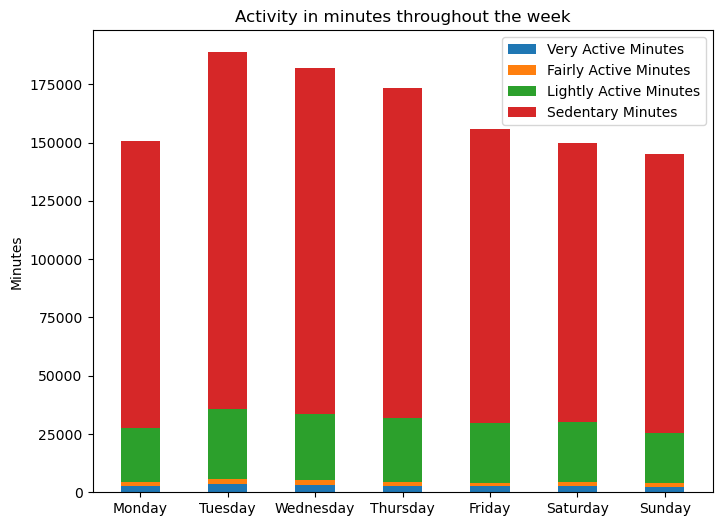

In [15]:
# Generating a stacked bar chart depicting the variation in activity minutes across the week
plt.subplots(figsize=(8,6))
plt.bar(agg_data_sort['WeekOfTheDay'],agg_data_sort['total_very_active_mins'], width=0.45, label='Very Active Minutes')
plt.bar(agg_data_sort['WeekOfTheDay'],agg_data_sort['total_fairly_active_mins'], width=0.45, bottom=agg_data_sort['total_very_active_mins'], label='Fairly Active Minutes')
plt.bar(agg_data_sort['WeekOfTheDay'],agg_data_sort['total_lightly_active_mins'], width=0.45, bottom=agg_data_sort['total_very_active_mins']+agg_data_sort['total_fairly_active_mins'], label='Lightly Active Minutes')
plt.bar(agg_data_sort['WeekOfTheDay'],agg_data_sort['total_sedentary_mins'], width=0.45, bottom=agg_data_sort['total_very_active_mins']+agg_data_sort['total_fairly_active_mins']+agg_data_sort['total_lightly_active_mins'], label='Sedentary Minutes')
plt.legend()
plt.ylabel('Minutes')
plt.title('Activity in minutes throughout the week')
plt.show()

In the stacked bar chart above we can notice the contrast in the levels of activity across each day. Unsurprisingly, majority of the day was spent sedentary by the average user. This trend was noticed earlier. We can also note that between Friday and Monday there appears to be less physical activity compared to the mid-week. There could be multiple reasons for this, one being that the users are engaged in social activities and do not have the time for routine exercise.

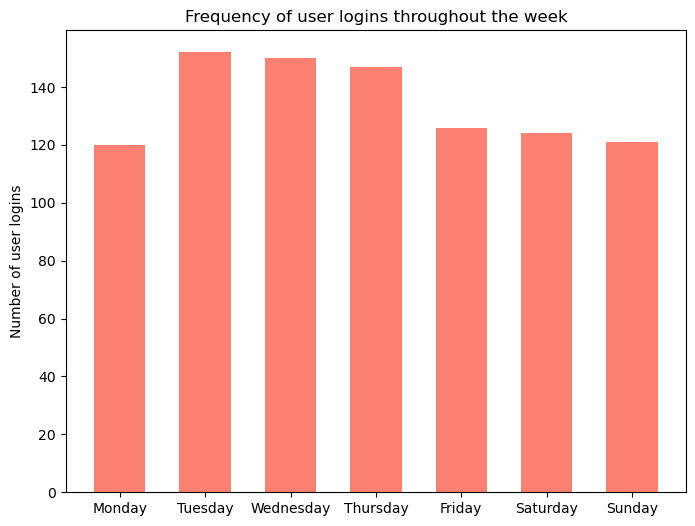

In [16]:
# The total count of user logins made in the month grouped by the day
plt.subplots(figsize=(8,6))
plt.bar(agg_data_sort['WeekOfTheDay'], agg_data_sort['user_count'], width=0.6, color='#FA8072')
plt.ylabel('Number of user logins')
plt.title('Frequency of user logins throughout the week')
plt.show()

Similar trends can be noticed with the number of user logins across the month, FitBit users tend to forget to track their activity during the later half of the week.

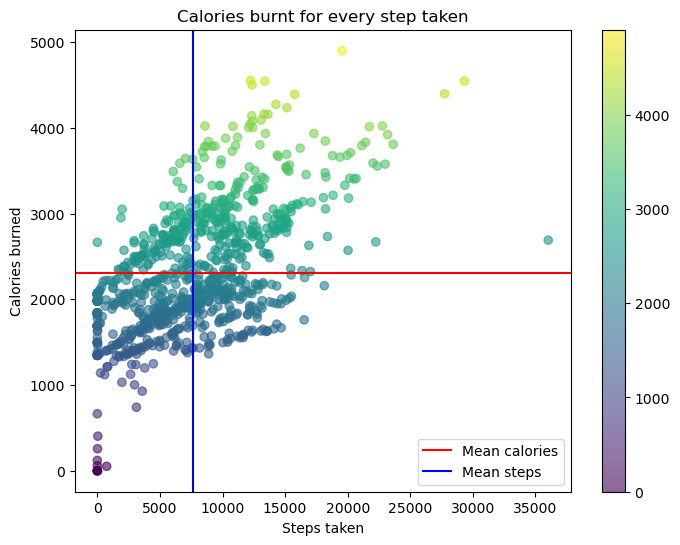

In [17]:
# Generating a scatter plot for calories burned vs steps taken
mean_calories = d_a['Calories'].mean()
mean_steps = d_a['TotalSteps'].mean()

plt.subplots(figsize=(8,6))
plt.scatter(d_a['TotalSteps'], d_a['Calories'], alpha=0.6, c=d_a['Calories'], cmap='viridis')
plt.colorbar()
plt.xlabel('Steps taken')
plt.ylabel('Calories burned')
plt.axhline(mean_calories, color='red', label='Mean calories')
plt.axvline(mean_steps, color='blue', label='Mean steps')
plt.title('Calories burnt for every step taken')
plt.legend()
plt.show()

What about the relation between calories burned and steps taken? Although the relationship should be obvious, the more steps someone takes, the more calories is burned, yet there do appear to be some outliers in the data. These include data points for 0 total steps with a positive value for calories burned. I decided to keep this data in the analysis just in case the data points were in fact legitimate. One observation of > 35000 steps with < 3000 calories burned confirms the fact that majority users spend their day sedentary. Overall a positive correlation exists between calories burned and steps taken.

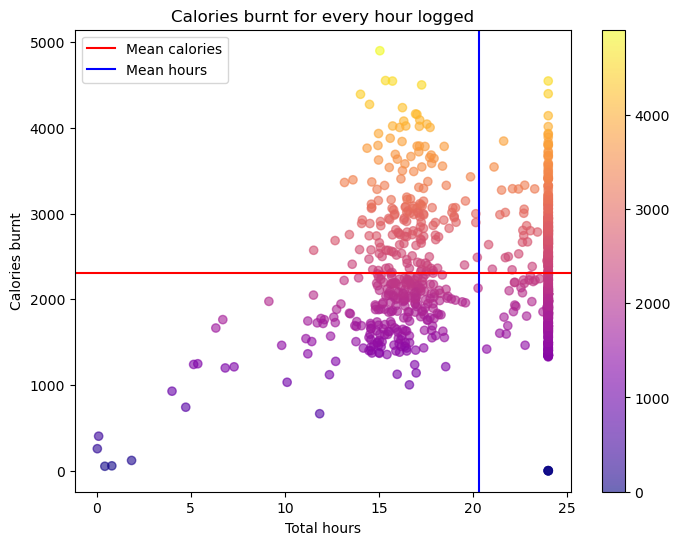

In [18]:
# Generating a scatter plot for calories burned vs hours logged
mean_calories = d_a['Calories'].mean()
mean_hours = d_a['TotalHours'].mean()

plt.subplots(figsize=(8,6))
plt.scatter(d_a['TotalHours'], d_a['Calories'], alpha=0.6, c=d_a['Calories'], cmap='plasma')
plt.colorbar()
plt.xlabel('Total hours')
plt.ylabel('Calories burnt')
plt.axhline(mean_calories, color='red', label='Mean calories')
plt.axvline(mean_hours, color='blue', label='Mean hours')
plt.title('Calories burnt for every hour logged')
plt.legend()
plt.show()

In terms of the calories burned per hour logged, there appears to be no coherent correlation, as some users may have logged long hours of sedentary activity (an average 17 hours out of the total average of 20 hours). Once again we see similar outliers in the data possibly due to the same reasons mentioned earlier.

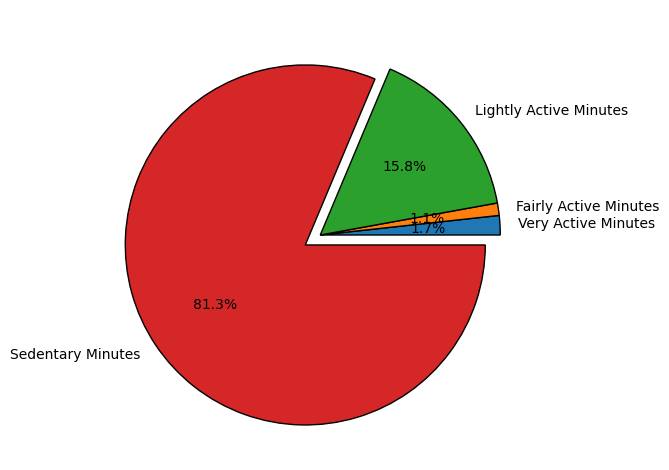

In [19]:
# Generating a pie chart showing the percentage of activity in minutes
sum_very_active_mins = d_a['VeryActiveMinutes'].sum()
sum_fairly_active_mins = d_a['FairlyActiveMinutes'].sum()
sum_lightly_active_mins = d_a['LightlyActiveMinutes'].sum()
sum_sedentary_mins = d_a['SedentaryMinutes'].sum()

pie_chart_data=[sum_very_active_mins, sum_fairly_active_mins, sum_lightly_active_mins, sum_sedentary_mins]
pie_labels=['Very Active Minutes', 'Fairly Active Minutes', 'Lightly Active Minutes', 'Sedentary Minutes']
plt.pie(pie_chart_data, autopct='%1.1f%%', explode=(0,0,0,0.1), labels=pie_labels, wedgeprops={'edgecolor':'black'})
plt.tight_layout()
plt.show()

Finally, the pie chart above makes it evidently clear that the 33 individuals surveyed were not active enough, as 81.3% of the activity time for an entire month was spent sedentary. For a fitness tracking app those are poor statistics considering very active and fairly active minutes only account for 2% and 1% of the total time respectively. 

## 6. Act
In this section I will provide my recommendations based on the insights I gained from the data. 

### Summary of the trends noticed
* The average user took 7,637 steps per day which is more than 3,000 steps below the recommended number.
* Users spend around 81% of their total activity time being sedentary.
* Most activity is done during days between Tuesday and Thursday.

### Recommendations
* Bellabeat can offer some incentives such as coupons, merchandise, exclusive in-app features etc., to promote routine exercise across the week. They can also offer greater incentives from Friday-Monday, since a lot of people lose motivation or consistency during this time of the week.
* Have an in-built calorie burn calculator where the user can input their burn goals, age, and weight. This way Bellabeat can make recommendations on their optimal calorie burn as well as remind them of reaching their daily goal.
* The Bellabeat marketing team can provide new, engaging activities that can possibly entice users to be active regularly, they can also provide appropriate documentation on health benefits, caloric intake and burn rates.